<div style="font-size: smaller; color: #808080; text-align: center; display: block;">MIT - 6.802 / 6.874 / 20.390 / 20.490 / HST.506 Computational Systems Biology: Deep Learning in the Life Sciences - Spring 2019</div>

# Problem Set 1: TensorFlow, MNIST, Softmax Regression

In this problem set, we will be using softmax regression (also known as multi-class logistic regression) to classify MNIST digits.

Problem set 1 is not intended to be difficult from a coding or machine learning perspective, but sets the stage for upcoming problem sets. The goal is to get acquainted to TensorFlow and the various steps in a machine learning project, as well as the Google Cloud environment and / or local Jupyter notebooks.

MNIST is a commonly used dataset in the machine learning (particularly the computer vision) community. It contains 70,000 low-resolution (28 x 28 pixels) grayscale images of handwritten digits (0 - 9). Seven example images for each of the 10 classes (i.e., digits) are shown below.
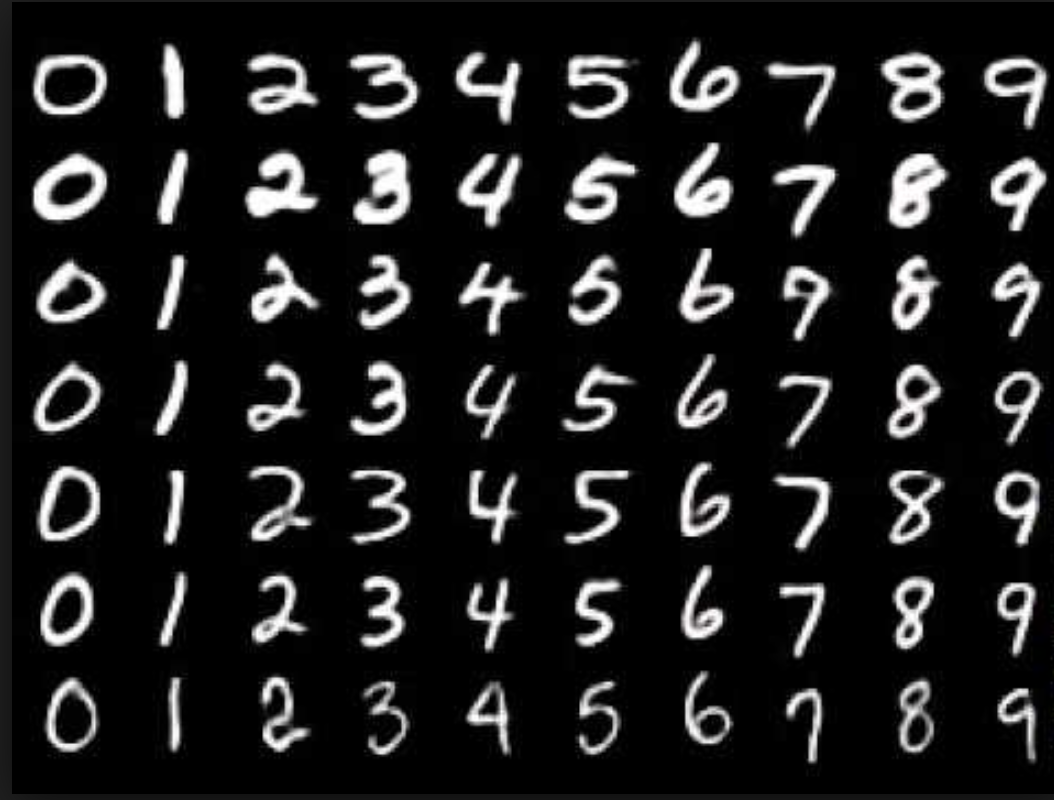

Our image classifier will use the raw pixel values as input features and returns a 10-dimensional vector that will tell us the probability of the input image belonging to each of the 10 classes corresponding to the digits 0 to 9. Since MNIST is a multi-class dataset (and not a multi-label dataset), the probabilities for the 10 classes sum up to 1 (i.e., the classes are mutually exclusive).

We follow the mathematical notation outlined in [Goodfellow, et al](https://github.com/janishar/mit-deep-learning-book-pdf/blob/master/chapter-wise-pdf/%5B3%5Dnotation.pdf). In brief, scalars are symbolized with lower case, slanted letters ($a$); vectors with lower case, slanted, boldface letters ($\boldsymbol{a}$); matrices with upper case, slanted, boldface letters ($\boldsymbol{A}$); and tensors with upper case, upright, boldface letters ($\boldsymbol{\text{A}}$). We do realize that technically all these objects are tensors, but find the distinction useful nonetheless.

In the following, the 784-dimensional input vector (28 x 28 pixels) of example $i$ is denoted by $\boldsymbol{x}^{(i)} \in \mathbb{R}^{784}$. The one-hot encoded label ([more about one-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)) of example $i$ (the ground truth) is denoted as $\boldsymbol{y}^{(i)} \in \{0, 1\}^K$, where $K = 10$, the 10 digits, and the predicted label from our classifier for input $\boldsymbol{x}^{(i)}$ is denoted by $\boldsymbol{\hat{y}}^{(i)}$.

In softmax regression (and logistic regression) intermediate $\boldsymbol{z}^{(i)}$ values for example $i$ are computed as follows:
$$\boldsymbol{z}^{(i)} = \boldsymbol{W}^\intercal \boldsymbol{x}^{(i)} + \boldsymbol{b},$$
where $\boldsymbol{W}$ are the weights (or model coefficients) and $\boldsymbol{b}$ are the bias terms, both of which are learned from the data.

The softmax regression model (the probability that example $i$ belongs to class $k$) is then defined as
$$P(\boldsymbol{y}^{(i)} = k | \boldsymbol{z}^{(i)}) = \phi_{\text{softmax}}(\boldsymbol{z}^{(i)})_k = \frac{\exp({z^{(i)}_k})}{\sum^K_{j = 1} \exp({z^{(i)}_j})}$$

The difference between softmax regression and logistic regression is how the $\boldsymbol{z}^{(i)}$ values are transformed. With $\phi_{\text{softmax}}(\boldsymbol{z}^{(i)})$ the components of vector $\boldsymbol{z}^{(i)}$ sum to 1, which is not the case for $\phi_{\text{sigmoid}}(\boldsymbol{z}^{(i)})$.

In the following, we will import TensorFlow and other libraries, load the MNIST dataset, familiarize ourselves with the data, perform some light preprocessing, define our softmax regression model, train the model parameters, and evaluate the performance of the trained model.

## Problem 1: Loading libraries and data

1. Either install TensorFlow (1.8.0 or newer), NumPy and matplotlib libraries on your local machine or run this notebook on Google Cloud (Datalab) or Google Colab. Installation instructions are [provided](https://mit6874.github.io/tutorials/quickstart/).
2. Run code segments to check if installation was successful

In [1]:
# import libraries and print TensorFlow version (recommended version >= 1.12.0)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# load MNIST dataset
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Problem 2: Data exploration and preprocessing (40 points)

At the beginning of every machine learning project it is important to familiarize yourself with the data.

The 70,000 examples in MNIST are subdivided into a training set containing 60,000 examples and a test set containing the remaining 10,000 examples.

In [ ]:
print(len(train_images))
print(len(test_images))

The images are stored in NumPy arrays / tensors:

In [ ]:
print(type(train_images))
print(train_images.shape)

In [ ]:
def plot_image(image_data):# plot example images
    if image_data.shape[0] == 784:
        image_data = image_data.reshape(28, 28)
    plt.figure()
    plt.imshow(image_data)
    plt.colorbar()
    plt.grid(False)
    plt.show()

plot_image(train_images[0])
# print corresponding class label
print("ground truth:", train_labels[0])

### Feature scaling

The raw pixel values range from 0 - 255.

Implement a function `preprocess` that scales the values to the range 0 - 1. Alternatively, input features can also be standardized (i.e., shifting and rescaling the input feature data to assure zero mean and unit variance). Scaling input features is often a good idea, especially when they are on vastly different scales. In our case all input features are on the same scale, but normalizing them is still a good idea as it helps gradient descent converge faster.

In [ ]:
def preprocess(x):
    ################################################################################
    # Arguments:
    # - x: image input data of shape [?, 28, 28]
    # Return values:
    # - x: scaled ([0 - 1] - preferred) or standardized (mu = 0, sigma^2 = 1) image input data of shape [?, 28, 28]
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return x

In [ ]:
# it is important to preprocess training and test sets in the same way
train_images = preprocess(train_images)
test_images = preprocess(test_images)

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Integer encoded labels to one-hot encoded labels

The ground truth class labels in `train_labels` and `test_labels` are stored as integer encoded labels, i.e., the different classes are encoded as different integer values in one dimension (`1` for the class of digit 1, `2` for the class of digit 2, and so on). Encoding classes like that suggests and order and a distance between them, which is misleading. We will use one-hot encoding instead, where each of the 10 classes is represented as a standard orthonormal basis in $\mathbb{R}^{10}$.

Run the code block to convert integer to one-hot encoded labels and check the output to understand the differences between integer and one-hot encoded labels.

In [ ]:
def integer_to_one_hot(labels_integer, num_classes):
    num_labels = labels_integer.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_integer.ravel()] = 1
    return labels_one_hot.astype(np.uint8)

labels_count = np.unique(train_labels).shape[0]

print("integer label of example 0:", train_labels[0])
print("integer label of example 1:", train_labels[1])
print("integer label of example 2:", train_labels[2])

train_labels = integer_to_one_hot(train_labels, labels_count)
test_labels = integer_to_one_hot(test_labels, labels_count)

print("one-hot encoded label of example 0:", train_labels[0])
print("one-hot encoded label of example 1:", train_labels[1])
print("one-hot encoded label of example 2:", train_labels[2])

### Reshape input features

`train_images.shape` revealed that the input data is organized in a 28 by 28 grid. For softmax regression, we will ignore the grid structure of the data for now. We will learn how to use 1-dimensional (sequential) and 2-dimensional structure of the input space in future problem sets.

Implement a function `flatten` that takes an array of shape `[?, 28, 28]` (such as `train_images` and `test_images`) and returns an array of shape `[?, 784]`, only changing the dimensional organization of the array, not the data.

Hint: NumPy provides a method that does just that! See https://docs.scipy.org/doc/numpy/user/quickstart.html

In [ ]:
def flatten(x):
    ################################################################################
    # Arguments:
    # - x: image input data of shape [?, 28, 28]
    # Return values:
    # - x: image data of shape [?, 784]
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return x

Check if arrays have been flattened appropriately:

In [ ]:
print(train_images.shape)
print(test_images.shape)

train_images = flatten(train_images)
test_images = flatten(test_images)

print(train_images.shape)
print(test_images.shape)

## Problem 3: Model definition (20 points)

Implement `calc_z`, a function that returns $z$ for all examples in $x$. 
$$\boldsymbol{z} = \boldsymbol{W}^\intercal \boldsymbol{x} + \boldsymbol{b},$$
where $\boldsymbol{W}$ is the weight matrix and $\boldsymbol{b}$ are the bias terms.

In [ ]:
def calc_z(x, W, b):
    ################################################################################
    # Arguments:
    # - x: image input data / placeholder of shape [?, 784]
    # - W: weight matrix / placeholder of shape [784, 10]
    # - b: bias vector / placeholder of shape [10]
    # Return values:
    # - z: z values of shape [?, 10]
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return z

In [ ]:
# input placeholder
x = tf.placeholder(tf.float32, [None, 784])

# label placeholder
y = tf.placeholder(tf.float32,[None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

z = calc_z(x, W, b)

# convert z values to probabilities using softmax
y_hat = tf.nn.softmax(z)

## Problem 4: Training process

### Hyperparameters of the training process

Hyperparameters are set at the beginning of the training process and are not optimized by the optimization algorithm (unlike parameters, the weights and biases).

Choosing appropriate hyperparameters is important and will be covered in a future problem set. For now, we use fixed values for the learning rate of the optimization algorithm ([more on learning rate](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)), the number of epochs and the batch size ([more on epochs and batch size](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)).

With a batch size of 100, we will implement mini-batch gradient descent in the training loop. Stochastic gradient descent uses a batch size of 1 (although typically most SGD implementations are mini-batch GD), and batch gradient descent uses a batch size of the size of the training set.

In [ ]:
learning_rate = 0.01
training_epochs = 25
batch_size = 100

### Define loss function

The loss function quantifies the difference between the estimated values ($\hat{y}$) and the ground truth ($y$) for the data. Of the various loss functions ([more on loss functions](https://blog.algorithmia.com/introduction-to-loss-functions/)), we use chose cross entropy loss here, as it is appropriate for softmax regression.

In [ ]:
# cross entropy loss (by hand)
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices = [1]))

# cross entropy loss (using TensorFlow implementation)
# loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels = y, logits = z))

### Set up optimizer

The optimizer's job is to find weights and biases that (locally) minimize the loss on the training set. We will use gradient descent ([more on gradient-descent-based optimization algorithms](http://ruder.io/optimizing-gradient-descent/), [more on gradient descent](http://fa.bianp.net/teaching/2018/eecs227at/gradient_descent.html)).

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### Run training process

TensorFlow offers various ways to implement the model, the training loop, and the data processing, both high-level (`tf.keras`, `tf.estimator`, `tf.data.Dataset`), mid-level (`tf.layers`), and low-level (tensors, variables, graphs, sessions). In this problem set we use low-level TensorFlow, which requires more lines of code, but is less of a black box than high-level APIs such as `tf.estimator`. For more information, see [this article on Medium](https://medium.com/google-developer-experts/demystify-the-tensorflow-apis-57d2b0b8b6c0).

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [ ]:
for epoch in range(training_epochs):
    avg_loss = 0.0
    total_batch = int(train_images.shape[0] / batch_size)

    for step in range(total_batch):
        offset = (step * batch_size) % (train_images.shape[0] - batch_size)
        batch_x = train_images[offset:(offset + batch_size), :]
        batch_y = train_labels[offset:(offset + batch_size)]

        _, batch_loss = sess.run([optimizer, loss], feed_dict = {x: batch_x, y: batch_y})

        avg_loss += batch_loss
    
    avg_loss /= total_batch
    print("epoch", str(epoch + 1) + ": loss =", round(avg_loss, 3))

## Problem 5: Model performance evaluation (20 points)

Implement the function `evaluate` below. `evaluate` takes image data and corresponding labels, then predicts the class labels using the trained softmax regression model from above, and calculates the accuracy of the predictions. Prediction accuracy is simply the number of correct predictions divided by the number of total predictions (i.e., the proportion of true predictions).

In [ ]:
def evaluate(images, labels, y_hat, y):
    ################################################################################
    # Arguments:
    # - images: image input data of shape [?, 784]
    # - labels: one-hot encoded class labels of shape [?, 10]
    # - y_hat: class label prediction tensor in computation graph
    # - y: label placeholder in computation graph
    # Return values:
    # - accuracy: numeric value
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return accuracy

In [ ]:
print("test set accuracy:", round(evaluate(test_images, test_labels, y_hat, y), 3))

Why do we use the test set instead of the training set to evaluate the model's prediction accuracy? Why split the data into two sets in the first place?

<span style="text-transform: uppercase; color: #408080; font-size: bigger; font-weight: bold;">Your (short) answer:</span>

## Problem 6: Prediction (20 points)

Now that we have a trained and evaluated handwritten digit classifier, let's classify some handwritten digits. For that we will take random images from `test_images`, display it, and predict its class.

Implement the function `predict`, which takes pixel data from one image and returns the class label of that image (using the trained softmax regression model).

In [ ]:
def predict(image_data, y_hat):
    ################################################################################
    # Arguments:
    # - image_data: image input data of shape [1, 784]
    # - y_hat: class label prediction tensor in computation graph
    # Return values:
    # - class_label: integer between 0 - 9, predicted class label of digit in image_data
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return class_label

In [ ]:
random_image = test_images[random.randint(0, test_images.shape[0] - 1)]
plot_image(random_image)

In [ ]:
predict(random_image.reshape(1, 784), y_hat)

In [ ]:
sess.close()